# Imports

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


2024-12-24 11:05:44.077455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load the Dataset

In [2]:

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')




   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float6

# EDA

In [9]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


<Axes: xlabel='price', ylabel='Count'>

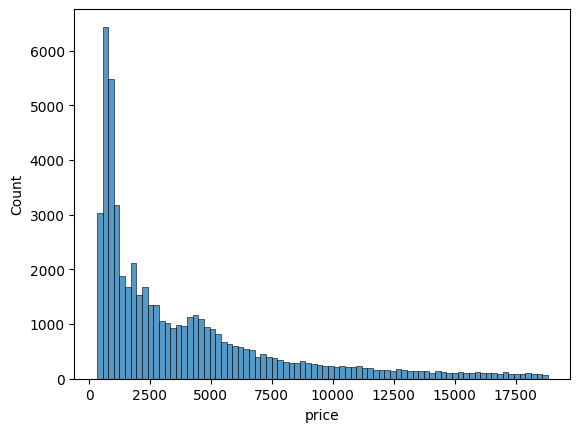

In [12]:
sns.histplot(diamonds.price)

# Exploring Diamod dataset from seaborn


In [ ]:
 # pair plot for all numeric variables

# Preprocess the Data

In [3]:

# Features and target
X = diamonds.drop(columns=['price'])
y = diamonds['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print(f"Preprocessed training data shape: {X_train_preprocessed.shape}")


Preprocessed training data shape: (43152, 26)


# Build a Regression Model with Keras

In [4]:

# Input dimension
input_dim = X_train_preprocessed.shape[1]

# Define the model
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_preprocessed, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
1079/1079 [==============================] - 3s 2ms/step - loss: 8733412.0000 - mae: 1616.4164 - val_loss: 1564146.8750 - val_mae: 780.8798
Epoch 2/50
1079/1079 [==============================] - 2s 2ms/step - loss: 1406564.0000 - mae: 685.0851 - val_loss: 987496.5000 - val_mae: 607.9962
Epoch 3/50
1079/1079 [==============================] - 3s 2ms/step - loss: 1119433.7500 - mae: 575.8450 - val_loss: 835088.9375 - val_mae: 543.7661
Epoch 4/50
1079/1079 [==============================] - 2s 2ms/step - loss: 998297.3750 - mae: 532.2954 - val_loss: 755439.9375 - val_mae: 505.3192
Epoch 5/50
1079/1079 [==============================] - 2s 2ms/step - loss: 905552.8125 - mae: 490.9583 - val_loss: 680208.2500 - val_mae: 455.8699
Epoch 6/50
1079/1079 [==============================] - 2s 2ms/step - loss: 822951.6250 - mae: 451.5692 - val_loss: 620006.4375 - val_mae: 420.4737
Epoch 7/50
1079/1079 [==============================] - 2s 2ms/step - loss: 756451.0625 - mae: 420.5587 - v

# Evaluate the Model

338/338 [==============================] - 1s 1ms/step - loss: 376799.5000 - mae: 317.6886
Test Loss: 376799.5, Test MAE: 317.6885986328125
338/338 [==============================] - 1s 1ms/step


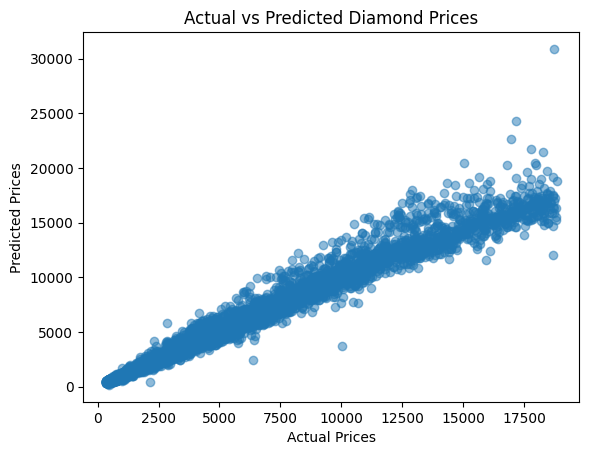

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_preprocessed, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predict on test set
y_pred = model.predict(X_test_preprocessed)

# Visualize predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Diamond Prices")
plt.show()
